# Data Augmentation


The objectives of this lab session are the following:
- Visualize augmented data samples
- Experiment with Data Augmentation

All experiments done on CIFAR10.


## Part 1 - Visualization of DA

**Data augmentation (DA) in Pytorch is done when defining the Dataset class. In order to enable DA, the class must accept a transforms argument, which will dynamically modify the original data samples by applying them a function.** 

**Most of the time, this function is a composition of several functions.** 

**Let's have a look at the default CIFAR10 transforms we have been using so far :**


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.dataloader import DataLoader
from torchvision.datasets import CIFAR10

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## RandomCrop
**which crops the image at a random location and pads the borders** [link](https://pytorch.org/vision/main/generated/torchvision.transforms.RandomCrop.html)

In [ ]:
transforms.RandomCrop?

In [3]:
transform_RandomCrop = transforms.Compose([
      transforms.RandomCrop(32, padding=0),
    transforms.ToTensor(),
    ##transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])

rootdir = './mydata/data'

c10RandomCrop = CIFAR10(rootdir,train=True,download=True,transform=transform_RandomCrop)

loader = DataLoader(c10RandomCrop,batch_size=4,shuffle=False) ### Shuffle to False so that we always see the same images


Files already downloaded and verified


**Let's do a figure for each batch**

(4, 3, 32, 32)


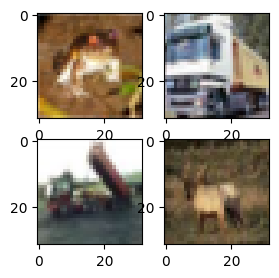

In [12]:
from matplotlib import pyplot as plt
f = plt.figure(figsize=(3,3))

for i,(data,target) in enumerate(loader):
    
    data = (data.numpy())
    print(data.shape)
    
    
    plt.subplot(2,2,1) #table size and postion in table
    plt.imshow(data[0].swapaxes(0,2).swapaxes(0,1))
    plt.subplot(2,2,2)
    plt.imshow(data[1].swapaxes(0,2).swapaxes(0,1))
    plt.subplot(2,2,3)
    plt.imshow(data[2].swapaxes(0,2).swapaxes(0,1))
    plt.subplot(2,2,4)
    plt.imshow(data[3].swapaxes(0,2).swapaxes(0,1))

    break

f.savefig('./mydata/train_DARandomCrop.png')

## RandomHorizontalFlip
**Horizontally flip the given image randomly with a given probability.** [link](https://pytorch.org/vision/main/generated/torchvision.transforms.RandomHorizontalFlip.html#torchvision.transforms.RandomHorizontalFlip)

In [ ]:
transforms.RandomHorizontalFlip?

In [10]:
transform_RandomHorizontalFlip = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    ##transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

rootdir = './mydata/data'

c10trainFlip = CIFAR10(rootdir,train=True,download=True,transform=transform_RandomHorizontalFlip)

loaderFlip = DataLoader(c10trainFlip,batch_size=4,shuffle=False) ### Shuffle to False so that we always see the same images

Files already downloaded and verified


**Let's do a figure for each batch**

(4, 3, 32, 32)


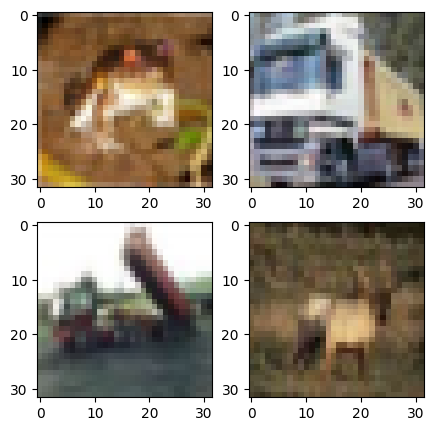

In [19]:
from matplotlib import pyplot as plt
f = plt.figure(figsize=(5,5))

for i,(data,target) in enumerate(loaderFlip):
    
    data = (data.numpy())
    print(data.shape)
    plt.subplot(2,2,1)
    plt.imshow(data[0].swapaxes(0,2).swapaxes(0,1))
    plt.subplot(2,2,2)
    plt.imshow(data[1].swapaxes(0,2).swapaxes(0,1))
    plt.subplot(2,2,3)
    plt.imshow(data[2].swapaxes(0,2).swapaxes(0,1))
    plt.subplot(2,2,4)
    plt.imshow(data[3].swapaxes(0,2).swapaxes(0,1))

    break

f.savefig('./mydata/train_DARandomHorizontalFlip.png')

## RandomVerticalFlip
**Vertically flip the given image randomly with a given probability.**

In [ ]:
transforms.RandomVerticalFlip?

In [23]:
transform_RandomVerticalFlip = transforms.Compose([
    transforms.RandomVerticalFlip(0.8),
    transforms.ToTensor(),
    ##transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

rootdir = './mydata/data'

c10trainVFlip = CIFAR10(rootdir,train=True,download=True,transform=transform_RandomVerticalFlip)

loaderVFlip = DataLoader(c10trainVFlip,batch_size=4,shuffle=False) ### Shuffle to False so that we always see the same images

Files already downloaded and verified


**Let's do a figure for each batch**

(4, 3, 32, 32)


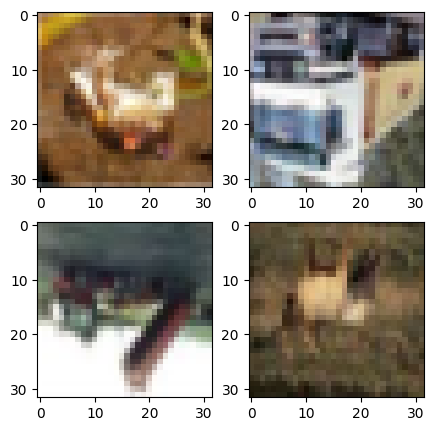

In [24]:
from matplotlib import pyplot as plt
f = plt.figure(figsize=(5,5))

for i,(data,target) in enumerate(loaderVFlip):
    
    data = (data.numpy())
    print(data.shape)
    plt.subplot(2,2,1)
    plt.imshow(data[0].swapaxes(0,2).swapaxes(0,1))
    plt.subplot(2,2,2)
    plt.imshow(data[1].swapaxes(0,2).swapaxes(0,1))
    plt.subplot(2,2,3)
    plt.imshow(data[2].swapaxes(0,2).swapaxes(0,1))
    plt.subplot(2,2,4)
    plt.imshow(data[3].swapaxes(0,2).swapaxes(0,1))

    break

f.savefig('./mydata/train_DARandomVerticalFlip.png')

## Note:
- Don't forget that you should not change the image size as a result of transformation. 
- There are also some popular packages for data augmentations such as albumentations, including a more detailed pytorch tutorial [here](https://albumentations.ai/docs/examples/pytorch_classification/). You can check out more examples of DA strategies there. 


## Combine of transformations and see the effect

Files already downloaded and verified
(4, 3, 25, 25)


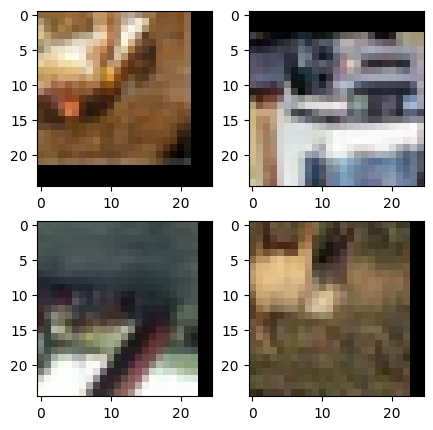

In [26]:
transform_DACombined = transforms.Compose([
    transforms.RandomCrop(25, padding=3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    ##transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

rootdir = './mydata/data'

c10trainDACombined = CIFAR10(rootdir,train=True,download=True,transform=transform_DACombined)

loaderDACombined = DataLoader(c10trainDACombined,batch_size=4,shuffle=False) ### Shuffle to False so that we always see the same images

from matplotlib import pyplot as plt
f = plt.figure(figsize=(5,5))

for i,(data,target) in enumerate(loaderDACombined):
    
    data = (data.numpy())
    print(data.shape)
    plt.subplot(2,2,1)
    plt.imshow(data[0].swapaxes(0,2).swapaxes(0,1))
    plt.subplot(2,2,2)
    plt.imshow(data[1].swapaxes(0,2).swapaxes(0,1))
    plt.subplot(2,2,3)
    plt.imshow(data[2].swapaxes(0,2).swapaxes(0,1))
    plt.subplot(2,2,4)
    plt.imshow(data[3].swapaxes(0,2).swapaxes(0,1))

    break

f.savefig('train_DACombined.png')